
# Installing Important Dependencies


In [ ]:
!pip install split-folders[full]
!pip install pydrive
import splitfolders

#using pytorch DataLoader module
import torch
import numpy as np
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth, files
#from oauth2client.client import GoogleCredentials 
#import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models
from skimage.io import imread
from skimage.transform import resize


# Mounting Drive to Access Implant Images

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # allow permission to access train data in google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/"Colab Notebooks"/output/train'
!ls {PATH_OF_DATA} #check if files are present and can be accessed

Bego_Implant  Bicon_Implant  Straumann_Implant


# Assigning GPU for Runtime

In [ ]:
# Setting seeds to try and ensure we have the same results

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

# Splitting the Data into TEST, TRAIN and VALIDATION sets

In [ ]:


"""

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.
splitfolders.fixed("/content/gdrive/My Drive/Colab Notebooks/TrainData3", 
                   output="output",
                   seed=1337, 
                   fixed=(100, 100), 
                   oversample=False, 
                   group_prefix=None, 
                   move=False) # default values

"""
print()

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/gdrive/My Drive/Colab Notebooks/output/train", 
                   output="output",
                   seed=1337, 
                   ratio=(.86, .1, .04), 
                   group_prefix=None, 
                   move=False) # default values

# Applying Transformations to the Images and Loading Tensors

In [ ]:
"""
def load_data(data_folder, batch_size, phase='train', train_val_split=True, train_ratio=.8):
    transform_dict = {
        'train': transforms.Compose(
            [transforms.Resize(256),
             transforms.RandomCrop(224),
             transforms.RandomHorizontalFlip(),
             transforms.ToTensor(),
             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225]),
             ]),
        'test': transforms.Compose(
            [transforms.Resize(224),
             transforms.ToTensor(),
             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225]),
             ])}

    data = datasets.ImageFolder(root=data_folder, transform=transform_dict[phase])
    if phase == 'train':
        if train_val_split:
            train_size = int(train_ratio * len(data))
            test_size = len(data) - train_size
            data_train, data_val = torch.utils.data.random_split(data, [train_size, test_size])
            train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True, drop_last=True,
                                                    num_workers=4)
            val_loader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, shuffle=False, drop_last=False,
                                                num_workers=4)
            return [train_loader, val_loader]
        else:
            train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, drop_last=True,
                                                    num_workers=4)
            return train_loader
    else: 
        test_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=False, drop_last=False,
                                                    num_workers=4)
        return test_loader

"""
## Defining transformations to be applied on image
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
#mean = [0.5, 0.5, 0.5]
#std = [0.5, 0.5, 0.5]

data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=mean, std=std)])

#trainset = datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/TrainData3", transform=data_transforms)
#testset= datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/TestData2", transform=data_transforms)
# Loading the datasets with ImageFolder
trainset = datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/output/train", transform=data_transforms)
valset= datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/output/val", transform=data_transforms)
testset= datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/output/test", transform=data_transforms)



trainloader = DataLoader(trainset, batch_size=150, shuffle=True)
valloader = DataLoader(valset, batch_size=89, shuffle=True)
testloader = DataLoader(testset, batch_size=89, shuffle=True)


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

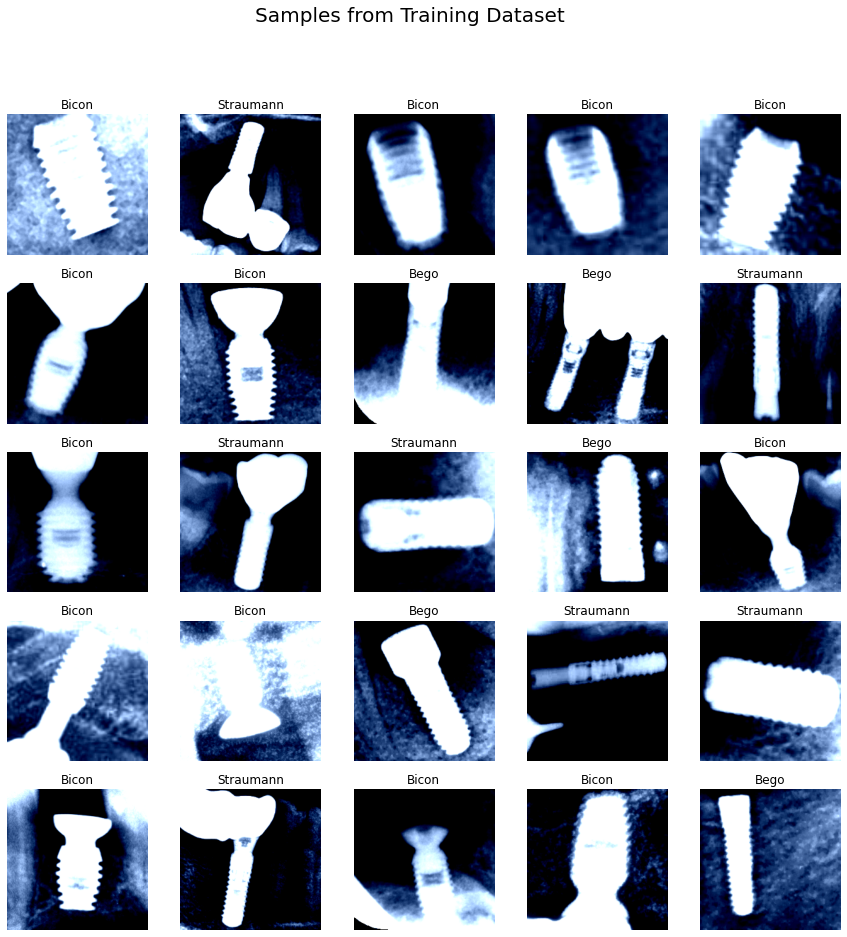

In [ ]:

labels_map = {
    0: "Bego",
    1: "Bicon",
    2: "Straumann"
}
figure = plt.figure(figsize=(15, 15))
plt.suptitle("Samples from Training Dataset", size=20)
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    img = img.swapaxes(0,1)
    img = img.swapaxes(1,2)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(np.squeeze(img))
plt.show()

# Downloading the Model

In [ ]:
model = models.vgg16(pretrained=True)
#model.features
#model.classifier

for param in model.parameters():
  param.requires_grad = False

model.classifier[-1] = nn.Sequential(
                       nn.Linear(in_features=4096, out_features=3),
                       nn.LogSoftmax(dim=1)
                        )



criterion = nn.NLLLoss()

# Training the Fixed Feature Extractor


In [ ]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())

In [ ]:
#RUN ONCE FOR TRAINING

num_epochs = 2
batch_loss = 0
cum_epoch_loss = 0
loss_list=[]
for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)})  Batch loss : {loss.item()}')
    
  print(f'Training loss : {batch_loss/len(trainloader)}')





Epoch(0/2 : Batch number(1/15)  Batch loss : 1.133955955505371
Epoch(0/2 : Batch number(2/15)  Batch loss : 1.1244595050811768
Epoch(0/2 : Batch number(3/15)  Batch loss : 1.018670916557312
Epoch(0/2 : Batch number(4/15)  Batch loss : 0.9263105988502502
Epoch(0/2 : Batch number(5/15)  Batch loss : 0.8952816724777222
Epoch(0/2 : Batch number(6/15)  Batch loss : 0.812171995639801
Epoch(0/2 : Batch number(7/15)  Batch loss : 0.7597667574882507
Epoch(0/2 : Batch number(8/15)  Batch loss : 0.7659518122673035
Epoch(0/2 : Batch number(9/15)  Batch loss : 0.7621144652366638
Epoch(0/2 : Batch number(10/15)  Batch loss : 0.6914597153663635
Epoch(0/2 : Batch number(11/15)  Batch loss : 0.6310992240905762
Epoch(0/2 : Batch number(12/15)  Batch loss : 0.6071233749389648
Epoch(0/2 : Batch number(13/15)  Batch loss : 0.6800928115844727
Epoch(0/2 : Batch number(14/15)  Batch loss : 0.6426159739494324
Epoch(0/2 : Batch number(15/15)  Batch loss : 0.2820805013179779
Training loss : 0.7822103520234426
Ep

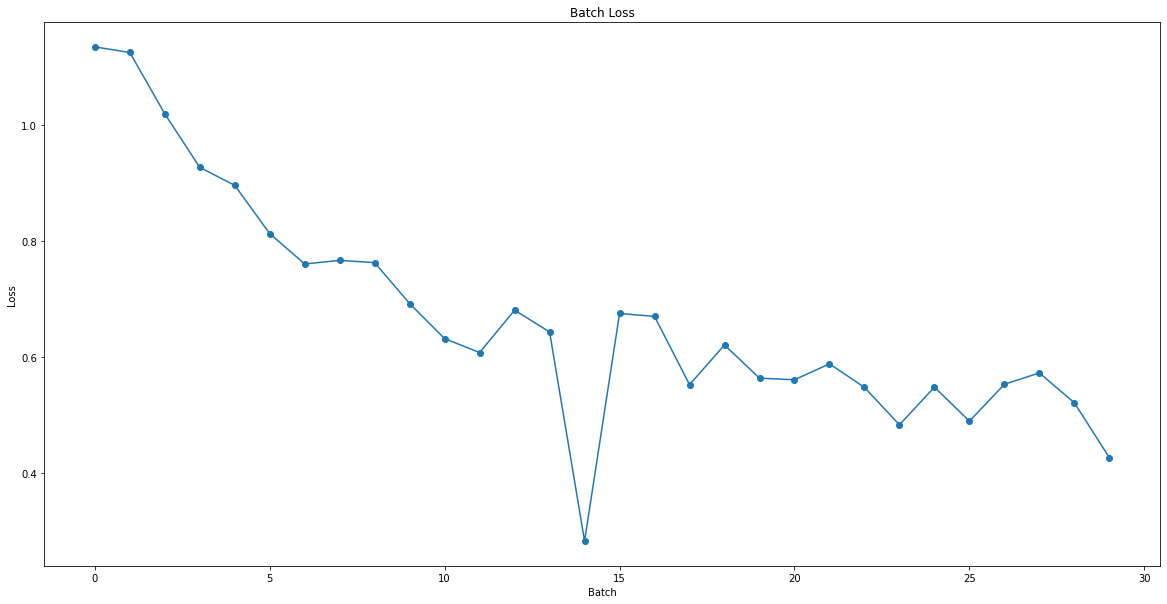

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Batch Loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(loss_list, marker="o")
plt.show()

In [ ]:
#SAVE THE MODEL
"""
model_save_name = 'classifier_baseline_dict.pt'
path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}" 
torch.save(model.state_dict(), path)
"""

#torch.save(model.state_dict(), 'MODEL1.pt')

print()

# Loading the Trained Baseline

In [ ]:
#LOAD THE MODIFIED AND TRAINED MODEL
"""
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}"
model.load_state_dict(torch.load(path))
"""

"""
model_save_name = 'classifier_baseline_dict.pt'
path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}"
model.load_state_dict(torch.load(path))
#model.eval()
"""

print()

# Evaluating the network and viewing images on VALIDATION SET


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#implant_classes = ['bego', 'bicon', 'straumann']
model.to('cpu') # to reduce GPU usage
model.eval() # set to eval mode as opposed to training mode

confidence_list=[]

with torch.no_grad():  #reduce memory usage, speed up computations, no backprop 
  images, labels = next(iter(valloader))
  logps = model(images)  
  output = torch.exp(logps)
  confidence_value,__=torch.max(output*100,1)
  pred = torch.argmax(output,1)
  #print(f'pred:{pred}')
  #print(f'labels:{labels}')
  #print(f'confidence:{confidence_value}')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 1,
        1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 2,
        1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0,
        1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2])
tensor([1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1,
        1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2,
        1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0,
        1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

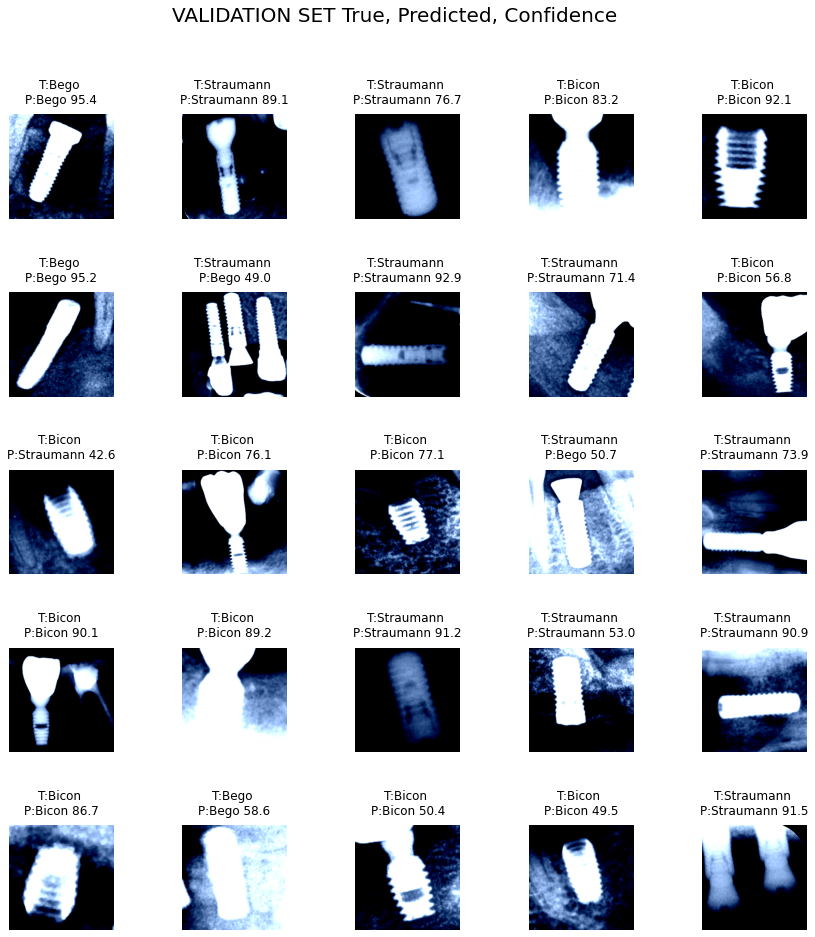

In [ ]:
print(pred)
print(labels)
model.to('cpu') # to reduce GPU usage
model.eval() # set to eval mode as opposed to training mode

labels_map = {
    0: "Bego",
    1: "Bicon",
    2: "Straumann"
}
figure = plt.figure(figsize=(15, 15))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    
    img = images[i]
    predicted_class=labels_map[pred[i].item()]
    confidence=confidence_value[i].item()
    
    figure.add_subplot(rows, cols, i)
    plt.subplots_adjust(hspace=0.7)
  
    plt.suptitle("VALIDATION SET True, Predicted, Confidence", size=20)
    plt.title("T:"+labels_map[labels[i].item()]+" \nP:"+predicted_class+" "+str(round(confidence,1)), y=1.05)
    plt.axis("off")
    
    img = img.swapaxes(0,1)
    img = img.swapaxes(1,2)
    
    plt.imshow(np.squeeze(img))
plt.show()




In [ ]:
#test_image_id=47

def denormalize(tensor):
  tensor = tensor*std+ mean
  return tensor

def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)
  plt.show()
  
def get_implant_class(id):
  implant_classes = ['bego', 'bicon', 'straumann']
  return implant_classes[id]



# Viewing images & normalization
 

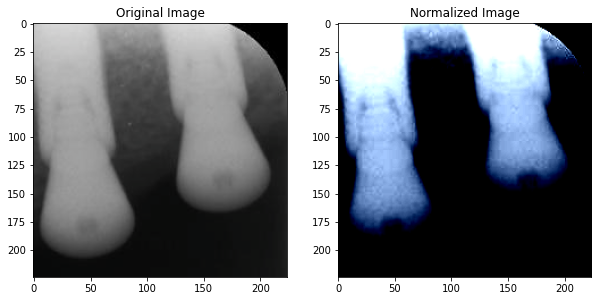

In [ ]:
test_image_id=25

plt.figure(figsize=(10,10))

plt.subplot(1,2,2)
plt.title("Normalized Image")
plt.imshow(np.clip(np.transpose(images[test_image_id],(1,2,0)),0,1))

plt.subplot(1,2,1)
plt.title("Original Image")
show_img(images[test_image_id])

plt.show()


# Model Evaluation on VALIDATION SET



In [ ]:



model.to('cpu')

model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for batch, (images, labels) in enumerate(valloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        confidence_value,__=torch.max(output*100,1)
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'BASELINE Accuracy of the model on {total} test images: {num_correct * 100 / total}% or {num_correct}/{total} correct ')

    #torch.sum((pred == labels).int())

Batch (1/3)
Batch (2/3)
Batch (3/3)
BASELINE Accuracy of the model on 261 test images: 81.99233716475096% or 214/261 correct 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

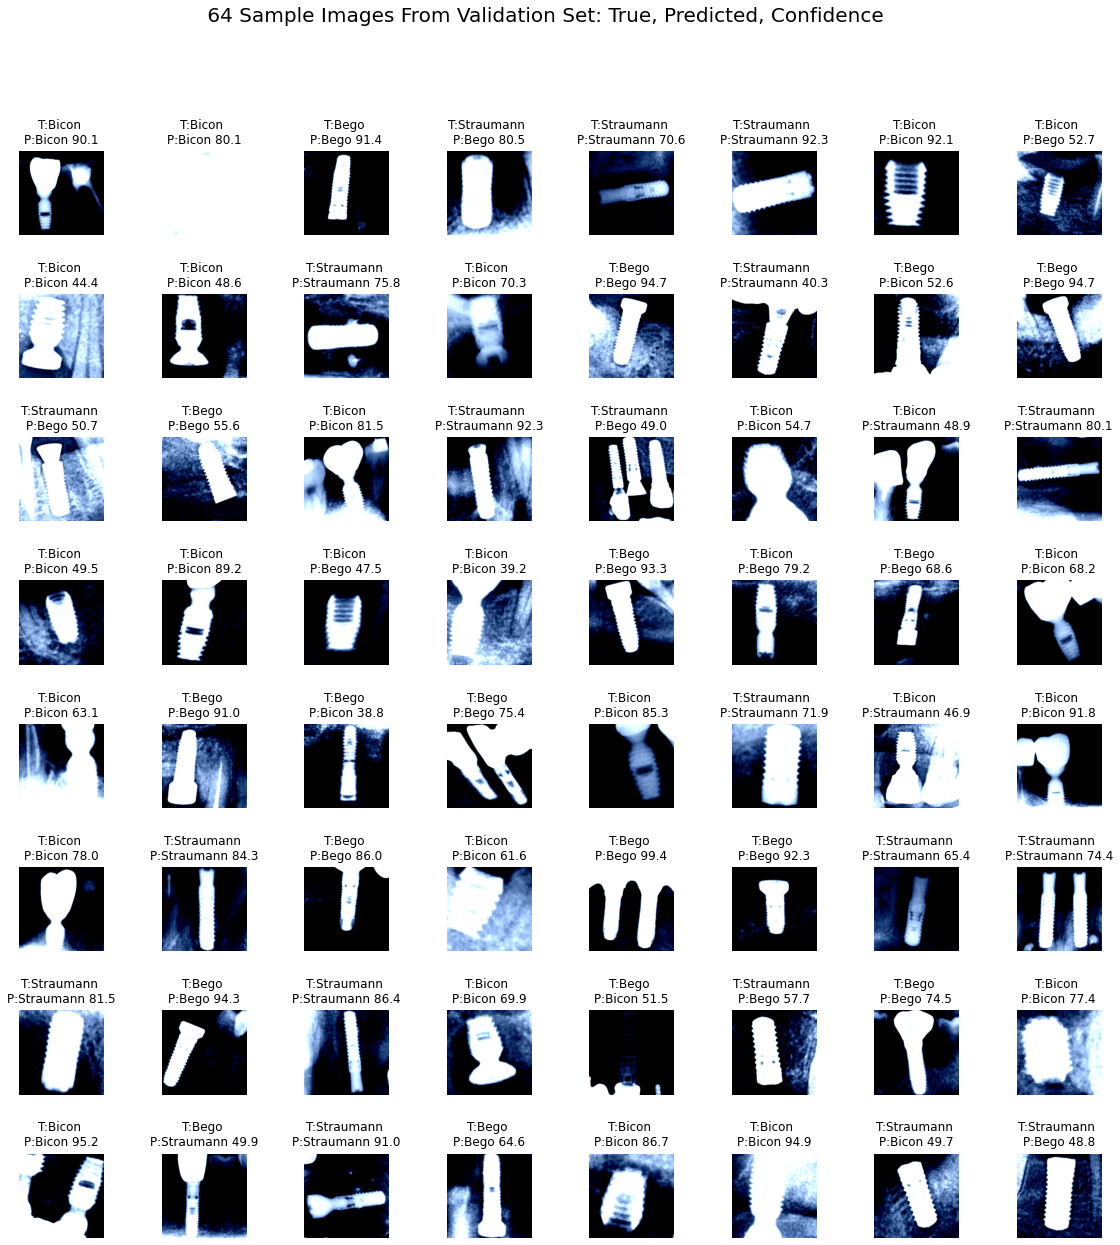

In [ ]:
#PRINTING VALIDATION SET PREDICTIONS


labels_map = {
    0: "Bego",
    1: "Bicon",
    2: "Straumann"
}

figure = plt.figure(figsize=(20, 20))
cols, rows = 8, 8

for i in range(0, cols * rows):
  img=images[i]
  predicted_class=labels_map[pred[i].item()]
  confidence=confidence_value[i].item()
    
  figure.add_subplot(rows, cols, i+1)
  plt.subplots_adjust(hspace=0.7)
  
  plt.suptitle(" 64 Sample Images From Validation Set: True, Predicted, Confidence", size=20)
  plt.title("T:"+labels_map[labels[i].item()]+" \nP:"+predicted_class+" "+str(round(confidence,1)), y=1.02)
  plt.axis("off")
    
  img = img.swapaxes(0,1)
  img = img.swapaxes(1,2)
    
  plt.imshow(np.squeeze(img))
plt.show()

  




In [ ]:
#storing index of the wrong predictions
wrong_preds=[]
for i in range (0,len(pred)):
  if pred[i]!=labels[i]:
    wrong_preds.append(i)
wrong_preds


[3,
 7,
 14,
 16,
 20,
 22,
 26,
 29,
 34,
 38,
 52,
 53,
 57,
 62,
 63,
 67,
 68,
 71,
 75,
 76,
 77]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

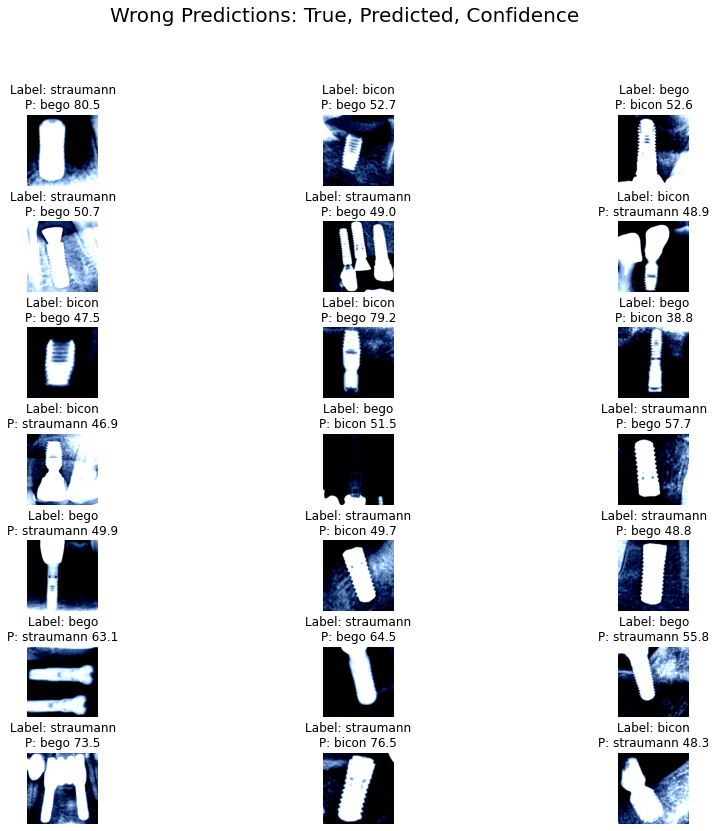

In [ ]:
figure = plt.figure(figsize=(15, 15))

rows,cols  = (len(wrong_preds)/3)+1, 3
plt.suptitle("Wrong Predictions: True, Predicted, Confidence", size=20)

c=1
for i in wrong_preds:
  testimg = images[i]
  imp_class_pred=get_implant_class(pred[i])
  imp_class_labl=get_implant_class(labels[i])
  
  figure.add_subplot(rows, cols, c)
  c+=1
  plt.title(f'Label: {imp_class_labl}\nP: {imp_class_pred} {str(round(confidence_value[i].item(), 1))}', y=1)
  plt.subplots_adjust(hspace=0.5)
  
  plt.axis("off")
  testimg = testimg.swapaxes(0,1)
  testimg = testimg.swapaxes(1,2)
  plt.imshow(np.squeeze(testimg))    
plt.show()





# Fine-Tuning the Model on TRAIN SET
## Un-freezing & training on the LAST TWO CNN block onwards

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Re-training the model

In [ ]:
for i in range(4,24): #17
  model.features[i].requires_grad = True

In [ ]:
model = model.to(device)
optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 15
batch_loss = 0
cum_epoch_loss = 0
loss_list=[]

for e in range(num_epochs):
  cum_epoch_loss = 0
  
  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())
    
    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)}) : Batch loss : {loss.item()}')
  
  #cum_epoch_loss+=batch_loss
  print(f'Training loss : {batch_loss/len(trainloader)}')  #cumulative epoch loss

  

Epoch(0/15 : Batch number(1/15) : Batch loss : 0.47375914454460144
Epoch(0/15 : Batch number(2/15) : Batch loss : 0.5077586770057678
Epoch(0/15 : Batch number(3/15) : Batch loss : 0.5397827625274658
Epoch(0/15 : Batch number(4/15) : Batch loss : 0.4224643409252167
Epoch(0/15 : Batch number(5/15) : Batch loss : 0.40870431065559387
Epoch(0/15 : Batch number(6/15) : Batch loss : 0.5011463761329651
Epoch(0/15 : Batch number(7/15) : Batch loss : 0.3458887040615082
Epoch(0/15 : Batch number(8/15) : Batch loss : 0.4105038046836853
Epoch(0/15 : Batch number(9/15) : Batch loss : 0.45925548672676086
Epoch(0/15 : Batch number(10/15) : Batch loss : 0.3708612620830536
Epoch(0/15 : Batch number(11/15) : Batch loss : 0.4782272279262543
Epoch(0/15 : Batch number(12/15) : Batch loss : 0.4759555160999298
Epoch(0/15 : Batch number(13/15) : Batch loss : 0.48499125242233276
Epoch(0/15 : Batch number(14/15) : Batch loss : 0.4513203501701355
Epoch(0/15 : Batch number(15/15) : Batch loss : 0.13023921847343445

In [1]:
plt.figure(figsize=(20, 5))
plt.plot(loss_list, marker="o")
plt. title("Batch Loss")
plt.xlabel("Batch Number")
plt.ylabel("Loss")

plt.show()

NameError: ignored

In [ ]:
#SAVE THE MODEL

model_save_name = 'classifier_finetuned_dict.pt'
path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}" 
torch.save(model.state_dict(), path)


print()

In [ ]:

#LOAD THE MODIFIED AND TRAINED MODEL

#model_save_name = 'classifier.pt'
#path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}"
#model.load_state_dict(torch.load(path))



## The accuracy of the model on TEST SET


In [ ]:
testset= datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/output/test", transform=data_transforms)

testloader = DataLoader(testset, batch_size=150, shuffle=True)



model.to('cpu')
model.eval()

with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for batch, (images, labels) in enumerate(testloader,1):
        
        logps = model(images)
        output = torch.exp(logps)
        
        confidence_value,__=torch.max(output*100,1)

        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')
        
        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% or {num_correct}/{total} CORRECT ')

Batch (1/2)
Batch (2/2)
Accuracy of the model on 265 test images: 89.05660377358491% or 236/265 CORRECT 


In [ ]:
#storing index of the wrong predictions of the given batch
wrong_preds=[]
for i in range (0,len(pred)):
  if pred[i]!=labels[i]:
    wrong_preds.append(i)
wrong_preds


[6, 27, 33, 48, 50, 59, 84, 86, 96, 105]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


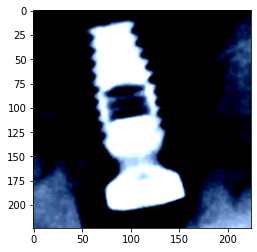

In [ ]:
testimg=images[15]
testimg = testimg.swapaxes(0,1)
testimg = testimg.swapaxes(1,2)
plt.imshow(np.squeeze(testimg))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

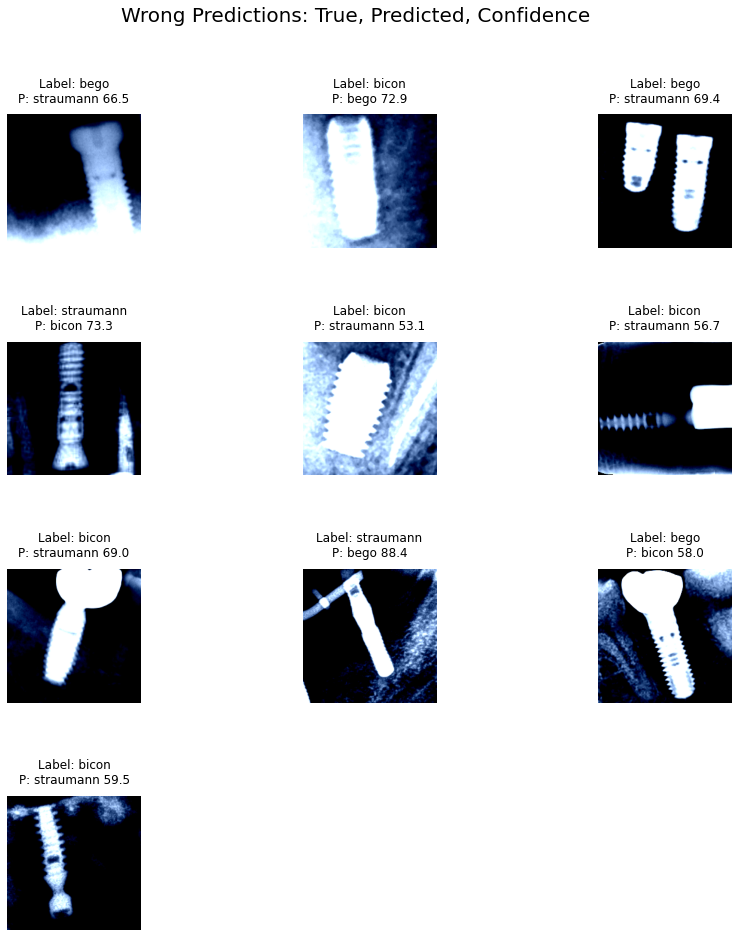

In [ ]:
figure = plt.figure(figsize=(15, 15))
rows,cols  = (len(wrong_preds)/3)+1, 3
plt.suptitle("Wrong Predictions: True, Predicted, Confidence", size=20)

c=1
for i in wrong_preds:
  testimg=images[i]
  imp_class_pred=get_implant_class(pred[i])
  imp_class_labl=get_implant_class(labels[i])
  figure.add_subplot(rows, cols, c)
  plt.subplots_adjust(hspace=0.7)

  c+=1
  plt.title(f'Label: {imp_class_labl}\nP: {imp_class_pred} {str(round(confidence_value[i].item(), 1))}', y=1.05)
  plt.subplots_adjust()
  
  plt.axis("off")
  testimg = testimg.swapaxes(0,1)
  testimg = testimg.swapaxes(1,2)
  plt.imshow(np.squeeze(testimg))    
plt.show()




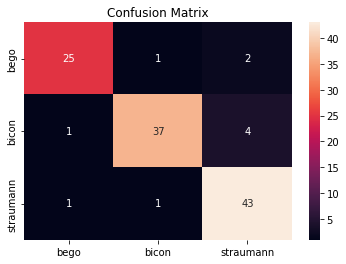

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

plt.title("Confusion Matrix")

idx2class={0:'bego', 1:'bicon', 2:'straumann'}

confusion_matrix_df = pd.DataFrame(confusion_matrix(labels, pred)).rename(columns=idx2class, index=idx2class)

fig=sns.heatmap(confusion_matrix_df, annot=True)

plt.show()

In [ ]:
print(classification_report(labels, pred, target_names=['bego', 'bicon', 'straumann']))

              precision    recall  f1-score   support

        bego       0.93      0.89      0.91        28
       bicon       0.95      0.88      0.91        42
   straumann       0.88      0.96      0.91        45

    accuracy                           0.91       115
   macro avg       0.92      0.91      0.91       115
weighted avg       0.92      0.91      0.91       115



# Implementing GradCAM

In [ ]:
!pip install grad-cam

# https://www.youtube.com/watch?v=1ZbLA7ofasY

# https://pyimagesearch.com/2021/10/04/image-data-loaders-in-pytorch/

# https://pyimagesearch.com/2021/10/11/pytorch-transfer-learning-and-image-classification/ 

test_image_id=43
img_label=labels[test_image_id]
img_pred=labels[test_image_id]

print(f'Label:{img_label}')
print(f'Pred:{img_pred}')

model = models.vgg16(pretrained=True)

model.to(device)

model

Label:1
Pred:1


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

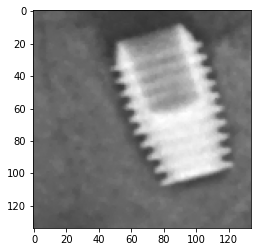

In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
target_layer = model.features[-1]
target_layer


"""gradCAMset= datasets.ImageFolder(root= "/content/gdrive/My Drive/Colab Notebooks/GradCAMData3", transform=data_transforms)
gradCAMsetloader = DataLoader(gradCAMset, batch_size=1, shuffle=False)

for images, labels in gradCAMsetloader:
  print(images.size(), labels.size())
  input_tensor = images[0]

input_tensor
"""


img = imread('/content/gdrive/My Drive/Colab Notebooks/TestData2/Bicon_Implant/BCN2.jpg') #'bulbul.jpg'

plt.imshow(img)
plt.show()

img = resize(img, (224,224), preserve_range = True)

img = np.expand_dims(img.transpose((2,0,1)),0)

img /= 255.0
mean = np.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
std = np.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
img = (img - mean)/std
inpimg = torch.from_numpy(img).to(device, torch.float32)



#input_tensor = images[test_image_id]

#img = data_transforms(img)

img = imread('/content/gdrive/My Drive/Colab Notebooks/TestData2/Bicon_Implant/BCN8.jpg') #'bulbul.jpg'
img = resize(img, (224,224), preserve_range = True)
img = np.expand_dims(img.transpose((2,0,1)),0)
img /= 255.0
mean = np.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
std = np.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
img = (img - mean)/std
inpimg = torch.from_numpy(img).to(device, torch.float32)




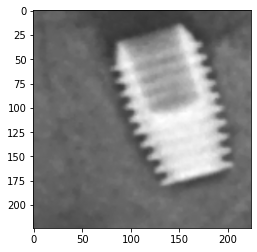

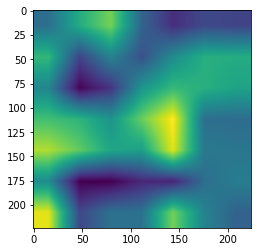

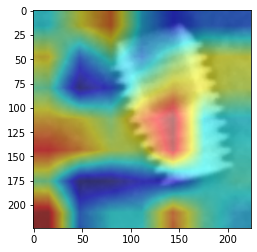

In [ ]:
import argparse
import cv2
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image
image_path='/content/gdrive/My Drive/Colab Notebooks/TestData2/Bicon_Implant/BCN2.jpg'

rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
rgb_img = resize(rgb_img, (224,224), preserve_range = True)
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])


#Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
cam = GradCAM(model=model, target_layers=[model.features[-1]])

grayscale_cam = cam(input_tensor=inpimg, targets=None)

grayscale_cam = grayscale_cam[0, :]

plt.imshow(rgb_img)
plt.show()


plt.imshow(grayscale_cam)
plt.show()

visualization = show_cam_on_image(rgb_img, grayscale_cam,  use_rgb=True)

plt.imshow(visualization)
plt.show()

# Processing an entire test batch through GradCAM


In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
target_layer = model.features[-1]
target_layer




MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [ ]:

images, labels = next(iter(testloader))
images[1]

tensor([[[-0.2392, -0.2627, -0.2549,  ..., -0.0824, -0.0667, -0.0980],
         [-0.2392, -0.2549, -0.2627,  ..., -0.0902, -0.0824, -0.0902],
         [-0.2392, -0.2627, -0.2549,  ..., -0.0824, -0.0824, -0.0745],
         ...,
         [-0.0824, -0.0824, -0.1216,  ...,  0.3882,  0.4118,  0.4039],
         [-0.0510, -0.0980, -0.1686,  ...,  0.4039,  0.4039,  0.4118],
         [-0.0353, -0.0588, -0.1294,  ...,  0.4431,  0.4510,  0.4588]],

        [[-0.2392, -0.2627, -0.2549,  ..., -0.0824, -0.0667, -0.0980],
         [-0.2392, -0.2549, -0.2627,  ..., -0.0902, -0.0824, -0.0902],
         [-0.2392, -0.2627, -0.2549,  ..., -0.0824, -0.0824, -0.0745],
         ...,
         [-0.0824, -0.0824, -0.1216,  ...,  0.3882,  0.4118,  0.4039],
         [-0.0510, -0.0980, -0.1686,  ...,  0.4039,  0.4039,  0.4118],
         [-0.0353, -0.0588, -0.1294,  ...,  0.4431,  0.4510,  0.4588]],

        [[-0.2392, -0.2627, -0.2549,  ..., -0.0824, -0.0667, -0.0980],
         [-0.2392, -0.2549, -0.2627,  ..., -0

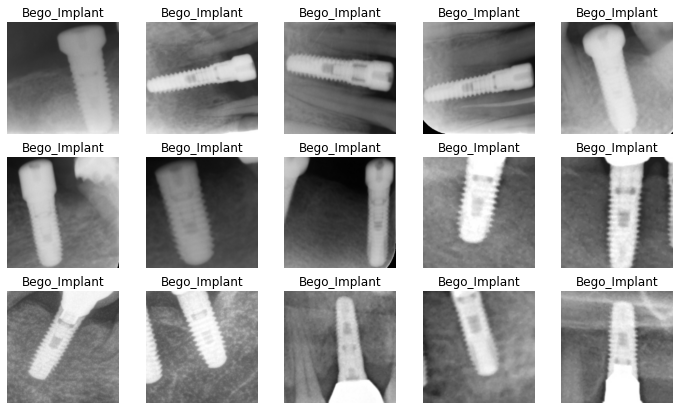

In [ ]:
# import the modules
import os
from os import listdir
import argparse
import cv2
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image

figure1=plt.figure(figsize=(12, 7))

rows=3
cols=5

implant_folder="Bego_Implant"
 


# get the path/directory
folder_dir = "/content/gdrive/My Drive/Colab Notebooks/output/test/"+implant_folder
c=0
for images in os.listdir(folder_dir):
  c+=1
  image_path=folder_dir+"/"+images
  # check if the image ends with png
  if c<(rows*cols)+1:
    rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
    rgb_img = resize(rgb_img, (224,224), preserve_range = True)
    rgb_img = np.float32(rgb_img) / 255
    input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])


    #Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
    #cam = GradCAM(model=model, target_layers=[model.features[-1]])
    #grayscale_cam = cam(input_tensor=inpimg, targets=None)
    #grayscale_cam = grayscale_cam[0, :]

    figure1.add_subplot(rows, cols, c)
    plt.imshow(rgb_img)
    
    plt.title(implant_folder)
    plt.axis("off")
    
    #visualization = show_cam_on_image(rgb_img, grayscale_cam,  use_rgb=True)
    #figure2.add_subplot(rows, cols, c)
    #plt.imshow(visualization)

  else:
    break
    
plt.show()
  
      

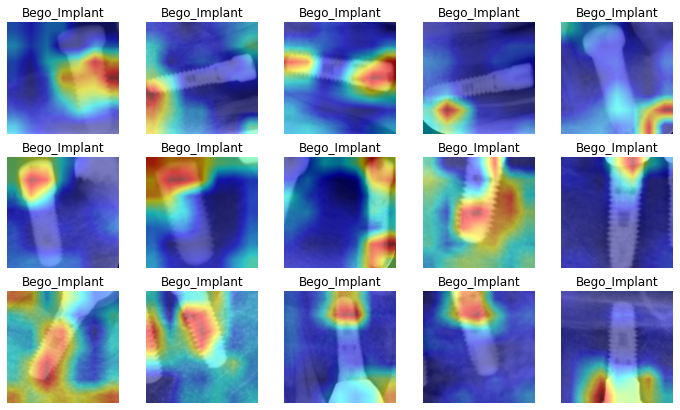

In [ ]:
# import the modules
import os
from os import listdir
import argparse
import cv2
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image


figure2=plt.figure(figsize=(12, 7))


 
# get the path/directory
folder_dir = "/content/gdrive/My Drive/Colab Notebooks/output/test/"+implant_folder
c=0
for images in os.listdir(folder_dir):
  c+=1
  image_path=folder_dir+"/"+images
  # check if the image ends with png
  if c<(rows*cols)+1:
    rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
    rgb_img = resize(rgb_img, (224,224), preserve_range = True)
    rgb_img = np.float32(rgb_img) / 255
    input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])



    img = imread(image_path) #'bulbul.jpg'
    img = resize(img, (224,224), preserve_range = True)
    img = np.expand_dims(img.transpose((2,0,1)),0)
    img /= 255.0
    mean = np.array([0.5, 0.5, 0.5]).reshape((1,3,1,1))
    std = np.array([0.5, 0.5, 0.5]).reshape((1,3,1,1))
    img = (img - mean)/std

    inpimg = torch.from_numpy(img).to(device, torch.float32)


    #Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
    cam = GradCAM(model=model, target_layers=[model.features[-1]])
    grayscale_cam = cam(input_tensor=inpimg, targets=None)
    grayscale_cam = grayscale_cam[0, :]

    #figure1.add_subplot(rows, cols, c)
    #plt.imshow(rgb_img)
    
    
    visualization = show_cam_on_image(rgb_img, grayscale_cam,  use_rgb=True)
    figure2.add_subplot(rows, cols, c)
    plt.imshow(visualization)
    plt.title(implant_folder)
    plt.axis("off")
    
    
  else:
    break
plt.show()
  
      

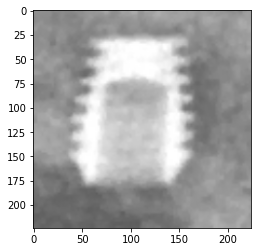

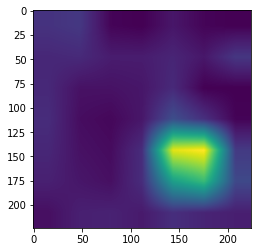

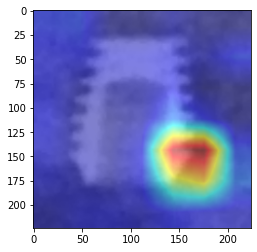

In [ ]:
image_path='/content/gdrive/My Drive/Colab Notebooks/TestData2/Bicon_Implant/BCN8.jpg'

rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
rgb_img = resize(rgb_img, (224,224), preserve_range = True)
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])


#Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
cam = GradCAM(model=model, target_layers=[model.features[-1]])

grayscale_cam = cam(input_tensor=inpimg, targets=None)

grayscale_cam = grayscale_cam[0, :]

plt.imshow(rgb_img)
plt.show()


plt.imshow(grayscale_cam)
plt.show()

visualization = show_cam_on_image(rgb_img, grayscale_cam,  use_rgb=True)

plt.imshow(visualization)
plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models
from skimage.io import imread
from skimage.transform import resize

In [ ]:
class GradCamModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.gradients = None
        self.tensorhook = []
        self.layerhook = []
        self.selected_out = None
        
        #PRETRAINED MODEL
        #self.pretrained = models.resnet50(pretrained=True)
        self.pretrained = models.vgg16(pretrained=True)


        self.layerhook.append(self.pretrained.features.register_forward_hook(self.forward_hook()))
        
        for p in self.pretrained.parameters():
            p.requires_grad = True
    
    def activations_hook(self,grad):
        self.gradients = grad

    def get_act_grads(self):
        return self.gradients

    def forward_hook(self): #forward hook takes as arguments, the input to the layer and the output from the layer
        def hook(module, inp, out):
            self.selected_out = out
            self.tensorhook.append(out.register_hook(self.activations_hook)) # register a hook using the register_hook method
        return hook #registers a backward hook to a tensor

    def forward(self,x):
        out = self.pretrained(x)
        return out, self.selected_out

<Figure size 1080x1080 with 0 Axes>

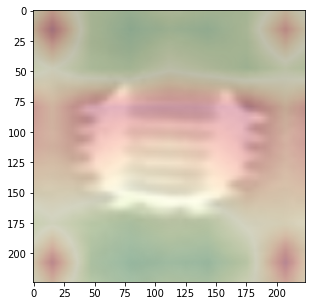

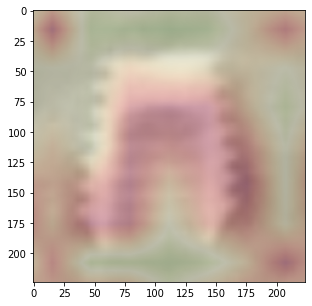

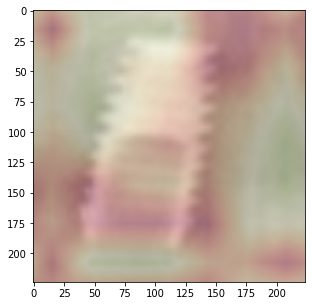

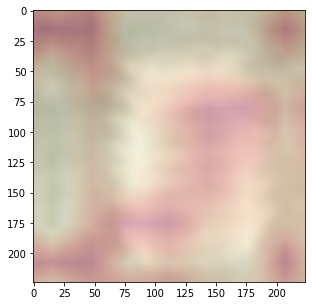

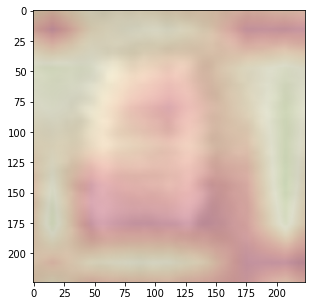

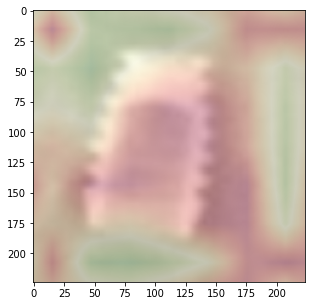

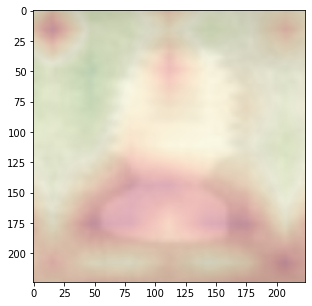

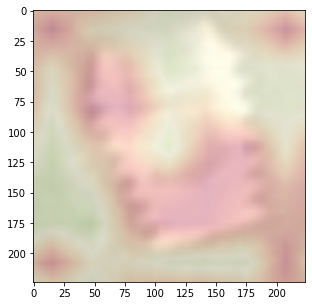

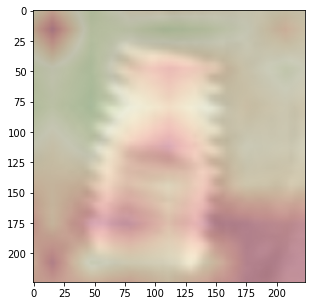

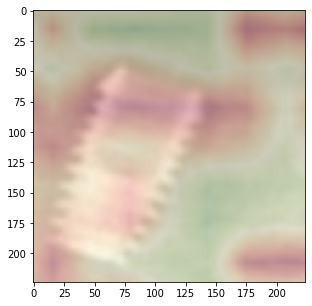

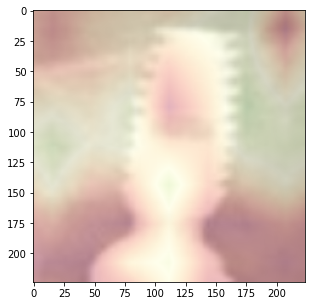

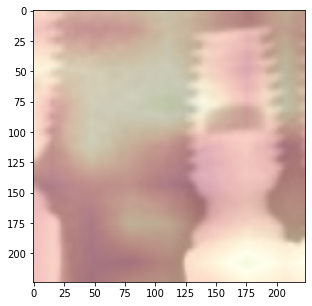

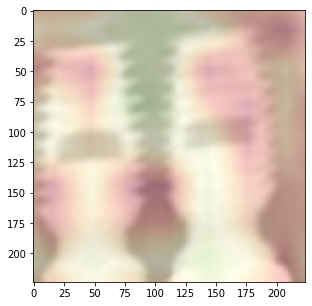

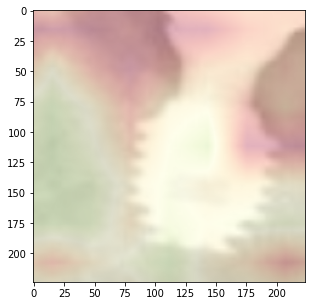

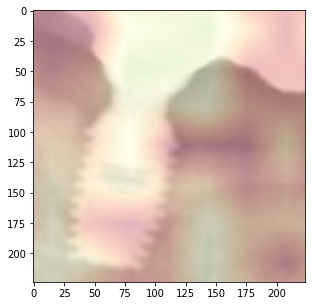

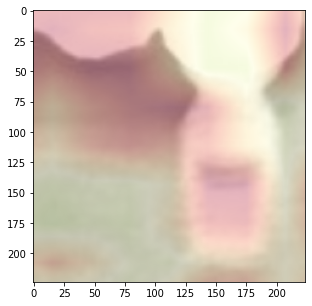

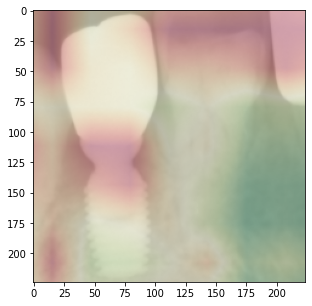

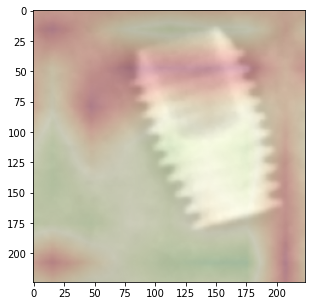

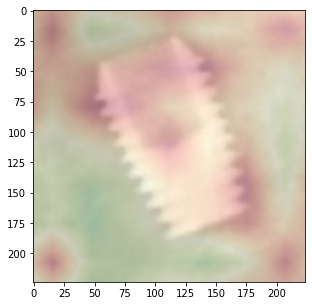

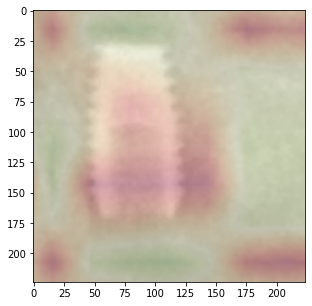

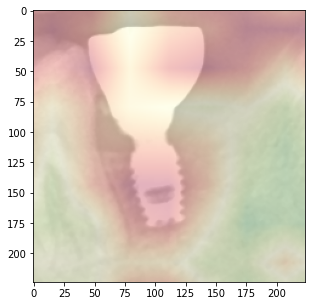

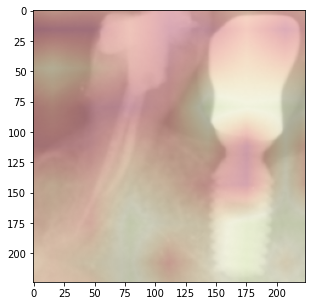

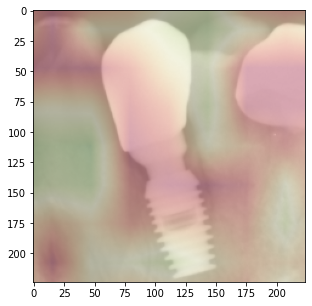

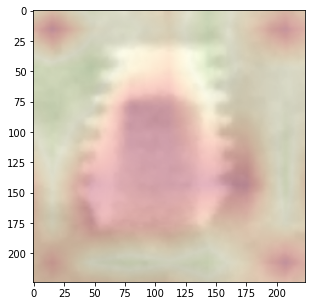

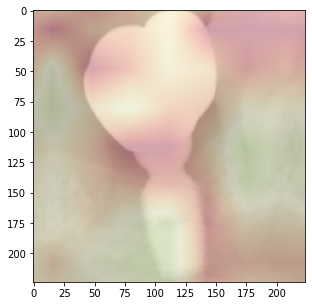

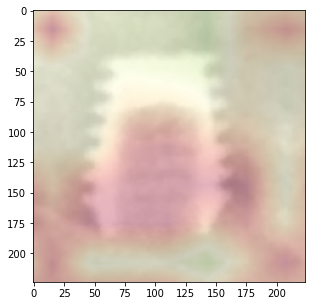

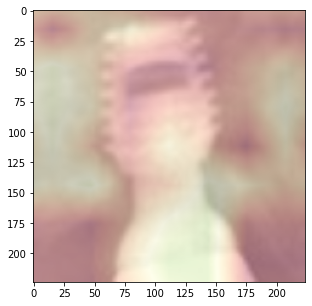

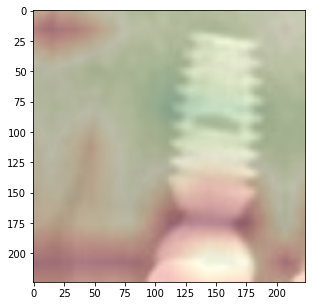

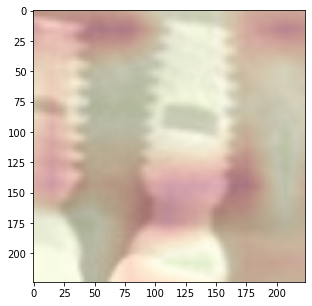

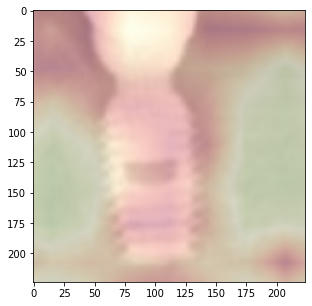

In [ ]:
gcmodel = GradCamModel().to(device)


####################################

figure=plt.figure(figsize=(15, 15))
implant_folder="Bicon_Implant"

 
# get the path/directory
#folder_dir = "/content/gdrive/My Drive/Colab Notebooks/output/test/"+implant_folder

folder_dir = "/content/gdrive/My Drive/Colab Notebooks/TestData2/"+implant_folder

c=0
for images in os.listdir(folder_dir):
  c+=1
  image_path=folder_dir+"/"+images
  # check if the image ends with png
  if c<(1*30)+1:
    gcmodel = GradCamModel().to(device)

    img = imread(image_path)
    img = resize(img, (224,224), preserve_range = True)
    img = np.expand_dims(img.transpose((2,0,1)),0)
    img /= 255.0
    mean = np.array([0.5, 0.5, 0.5]).reshape((1,3,1,1))
    std = np.array([0.5, 0.5, 0.5]).reshape((1,3,1,1))
    inpimg = torch.from_numpy(img).to(device, torch.float32)

    out, acts = gcmodel(inpimg)
    acts = acts.detach().cpu()
    loss = nn.CrossEntropyLoss()(out,torch.from_numpy(np.array([600])).to(device))
    loss.backward()
    grads = gcmodel.get_act_grads().detach().cpu()
    pooled_grads = torch.mean(grads, dim=[0,2,3]).detach().cpu()
    for i in range(acts.shape[1]):
      acts[:,i,:,:] += pooled_grads[i]
    
    heatmap_j = torch.mean(acts, dim = 1).squeeze()
    heatmap_j_max = heatmap_j.max(axis = 0)[0]
    heatmap_j /= heatmap_j_max

    heatmap_j = resize(heatmap_j,(224,224),preserve_range=True)

    cmap = mpl.cm.get_cmap('RdYlGn_r',256)
    
    heatmap_j2 = cmap(heatmap_j,alpha = 0.3)

    #figure.add_subplot(1, 10, c)
    
    fig, axs = plt.subplots(1,1,figsize = (5,5))
    
    axs.imshow((img*std+mean)[0].transpose(1,2,0))
    axs.imshow(heatmap_j2)
    plt.show()

    for h in gcmodel.layerhook:
     h.remove()
    for h in gcmodel.tensorhook:
      h.remove()

    ##################################
    """
    rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
    rgb_img = resize(rgb_img, (224,224), preserve_range = True)
    rgb_img = np.float32(rgb_img) / 255
    input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
    img = (img - mean)/std


    #Can be GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
    cam = GradCAM(model=model, target_layers=[model.features[-1]])
    grayscale_cam = cam(input_tensor=inpimg, targets=None)
    grayscale_cam = grayscale_cam[0, :]

    #figure1.add_subplot(rows, cols, c)
    #plt.imshow(rgb_img)
    
    
    visualization = show_cam_on_image(rgb_img, grayscale_cam,  use_rgb=True)
    figure2.add_subplot(rows, cols, c)
    plt.imshow(visualization)
    plt.title(implant_folder)
    plt.axis("off")
    """
    
  else:
    break
plt.show()
  


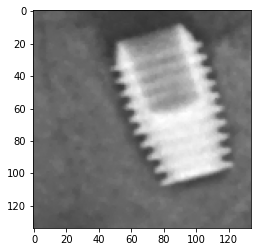

In [ ]:
img = imread('/content/gdrive/My Drive/Colab Notebooks/TestData2/Bicon_Implant/BCN2.jpg') #'bulbul.jpg'

plt.imshow(img)
plt.show()

img = resize(img, (224,224), preserve_range = True)

img = np.expand_dims(img.transpose((2,0,1)),0)

img /= 255.0
mean = np.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
std = np.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
img = (img - mean)/std
inpimg = torch.from_numpy(img).to(device, torch.float32)

  

In [ ]:
out, acts = gcmodel(inpimg)
acts = acts.detach().cpu()
loss = nn.CrossEntropyLoss()(out,torch.from_numpy(np.array([600])).to(device))
loss.backward()
grads = gcmodel.get_act_grads().detach().cpu()
pooled_grads = torch.mean(grads, dim=[0,2,3]).detach().cpu()
for i in range(acts.shape[1]):
 acts[:,i,:,:] += pooled_grads[i]
heatmap_j = torch.mean(acts, dim = 1).squeeze()
heatmap_j_max = heatmap_j.max(axis = 0)[0]
heatmap_j /= heatmap_j_max

In [ ]:
heatmap_j = resize(heatmap_j,(224,224),preserve_range=True)

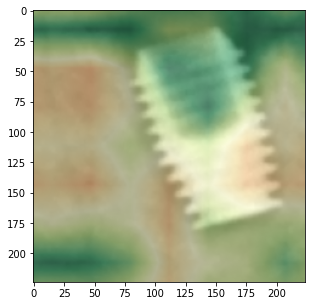

In [ ]:
cmap = mpl.cm.get_cmap('RdYlGn',256)
heatmap_j2 = cmap(heatmap_j,alpha = 0.5)
fig, axs = plt.subplots(1,1,figsize = (5,5))
axs.imshow((img*std+mean)[0].transpose(1,2,0))
axs.imshow(heatmap_j2)
plt.show()

In [ ]:
for h in gcmodel.layerhook:
    h.remove()
for h in gcmodel.tensorhook:
    h.remove()